# Data Analytics for the Identification of Electricity Theft

### Yves HERI

##### Master African Institue for Mathematical Sciences

_____________

## Data Preprocessing

The State Grid Corporation of China has released a practical dataset on electricity consumption. The dataset comprises the electricity consumption data of 42,372 electricity customers over a period of 1,035 days, starting from January 1, 2014 and ending on October 31, 2016. To access the data, please download all three zip files (data.zip, data.z01, and data.z02) and extract them simultaneously at https://github.com/henryRDlab/ElectricityTheftDetection.

_____

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns #; sns.set_theme()
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rc,rcParams
from collections import Counter

In [2]:
from sklearn.metrics import f1_score, roc_curve, auc, roc_auc_score, average_precision_score, precision_recall_curve, precision_recall_fscore_support, precision_score, recall_score, make_scorer, classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, matthews_corrcoef, average_precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import matplotlib
font = {'family' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

In [3]:
plt.rcParams['font.size'] = '14'

In [4]:
import warnings
  
# adding entry into the specifications
# of the warnings filter.
warnings.filterwarnings('ignore')

In [5]:
# # activate latex text rendering
# rc('text', usetex=True)
# rc('axes', linewidth=2)
# rc('font', weight='bold')
# rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

In [5]:
rawData = pd.read_csv('../data/data.csv')
infoData = pd.DataFrame()
infoData['FLAG'] = rawData['FLAG']
infoData['CONS_NO'] = rawData['CONS_NO']
data = rawData.drop(['FLAG', 'CONS_NO'], axis=1)

In [6]:
rawData

,CONS_NO,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,0387DD8A07E07FDA6271170F86AD9151,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B32AC8CC6D5D805AC053557AB05F5343,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.90,3.42,3.81,4.58,3.56,4.25,3.86,3.53,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42367,F1472871E1AFF49D4289564B6377D76C,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.25,3.56,3.38,4.39,3.72,3.77,3.96,3.64,3.40,4.38
42368,F3C8BBCD2DC26C1E0249DEEF6A4256B7,0,2.70,4.39,3.95,0.00,0.00,0.00,0.00,0.00,...,4.81,4.87,4.48,3.67,3.31,4.58,3.33,3.19,4.57,4.00
42369,A9A0FE83467A680FBFB0DBFC910DF227,0,0.58,0.84,1.61,0.90,0.60,0.82,0.89,0.03,...,NaN,0.66,2.92,2.36,3.86,4.28,3.37,6.67,2.44,1.15
42370,D9A6ADA018FA46A55D5438370456AA45,0,16.89,13.84,13.50,14.60,14.46,12.34,15.37,17.01,...,21.13,13.75,22.61,18.83,25.52,18.11,19.31,17.48,17.20,15.28


In [7]:
data

,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,2014/1/18,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
4,2.90,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.25,3.56,3.38,4.39,3.72,3.77,3.96,3.64,3.40,4.38
42368,2.70,4.39,3.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,4.81,4.87,4.48,3.67,3.31,4.58,3.33,3.19,4.57,4.00
42369,0.58,0.84,1.61,0.90,0.60,0.82,0.89,0.03,0.73,1.68,...,NaN,0.66,2.92,2.36,3.86,4.28,3.37,6.67,2.44,1.15
42370,16.89,13.84,13.50,14.60,14.46,12.34,15.37,17.01,13.46,19.56,...,21.13,13.75,22.61,18.83,25.52,18.11,19.31,17.48,17.20,15.28


In [8]:
dropIndex = data[data.duplicated()].index  # duplicates drop
data = data.drop(dropIndex, axis=0)
infoData = infoData.drop(dropIndex, axis=0)

In [9]:
zeroIndex = data[(data.sum(axis=1) == 0)].index  # zero rows drop
data = data.drop(zeroIndex, axis=0)
infoData = infoData.drop(zeroIndex, axis=0)

In [10]:
cols = data.columns

In [11]:
data.reset_index(inplace=True, drop=True)  # index sorting
infoData.reset_index(inplace=True, drop=True)

In [12]:
data

,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,2014/1/18,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
3,2.90,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.82,5.52,3.12,3.13,4.20,3.23,3.85,2.78,3.55,2.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.25,3.56,3.38,4.39,3.72,3.77,3.96,3.64,3.40,4.38
40252,2.70,4.39,3.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,4.81,4.87,4.48,3.67,3.31,4.58,3.33,3.19,4.57,4.00
40253,0.58,0.84,1.61,0.90,0.60,0.82,0.89,0.03,0.73,1.68,...,NaN,0.66,2.92,2.36,3.86,4.28,3.37,6.67,2.44,1.15
40254,16.89,13.84,13.50,14.60,14.46,12.34,15.37,17.01,13.46,19.56,...,21.13,13.75,22.61,18.83,25.52,18.11,19.31,17.48,17.20,15.28


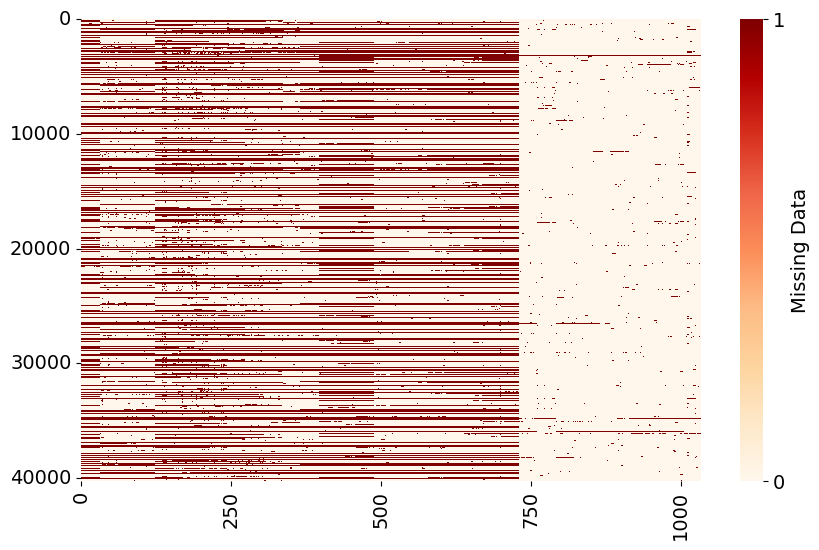

In [13]:
plt.figure(figsize=(10,6))
# sns.set(font_scale=1.5)
a=sns.heatmap(data.transpose().isna().transpose(),
            cmap="OrRd",
            cbar_kws={'label': 'Missing Data',"ticks":[0,1]})
plt.xticks([0, 250, 500,750,1000],[0, 250, 500,750,1000])
plt.yticks([0,10000, 20000,30000, 40000],[0,10000, 20000,30000, 40000])
# plt.savefig('missing.png')
plt.show()
# plt.savefig('missing.pdf') 

(0.0, 40200.0)

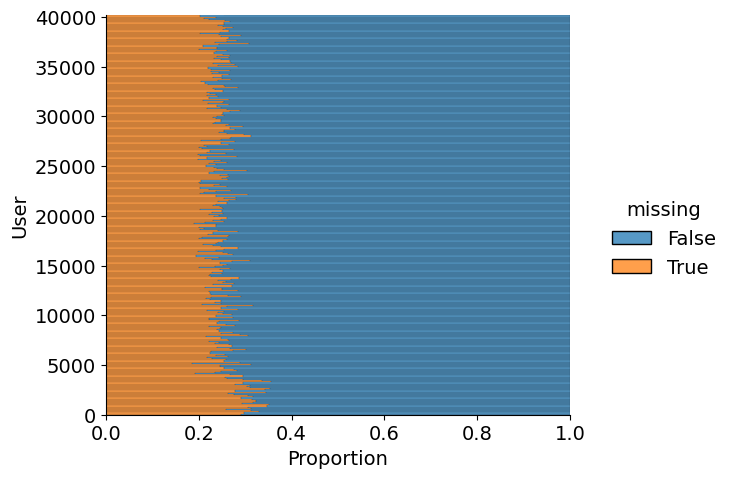

In [14]:
b=sns.displot(
    data=data.transpose().isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
# b.set_xticklabels(size = 12)
# b.set_yticklabels(size = 12)
plt.xlabel('Proportion')
plt.ylabel('User')
plt.ylim([0,40200])
# plt.savefig('missing_P.png')


### Fill the missing values

In this work, we exploit the interpolation method to recover the missing values according to the following equation,

\begin{equation}
f(x_i)=
\begin{cases}
\frac{x_{i-1}+x_{i+1}}{2} \quad  x_i \in NaN,\;x_{i-1},x_{i+1} \notin NaN \\
0 \quad\quad\quad \;  x_i \in NaN,\;x_{i-1}\;or\; x_{i+1} \in NaN \\
x_i \quad \quad \quad  x_i \notin NaN
\end{cases}
\end{equation}

The interpolate() function uses existing values in the DataFrame to estimate the missing rows.

In [15]:
data = data.interpolate(method='linear', limit=2,  # filling NaN values
                        limit_direction='both', axis=0).fillna(0)

### Handling the outliers

We restore the value by following equation according to "Three-sigma rule of dumb"

\begin{equation}
f(x_i)=
\begin{cases}
avg(\mathbf{x})+2\cdot std(\mathbf{x}) \quad  if \; x_i > avg(\mathbf{x})+2\cdot std(\mathbf{x})\\
x_i \quad \quad \quad otherwise
\end{cases}
\end{equation}

In [16]:
for i in range(data.shape[0]):  # outliers treatment
    m = data.loc[i].mean()
    st = data.loc[i].std()
    data.loc[i] = data.loc[i].mask(data.loc[i] > (m + 3 * st), other=m + 3 * st)

In [17]:
data.to_csv(r'../data/visualization.csv', index=False, header=True)  # preprocessed data without scaling

In [18]:
scale = MinMaxScaler()
scaled = scale.fit_transform(data.values.T).T
mData = pd.DataFrame(data=scaled, columns=data.columns)
# print(mData)
preprData = pd.concat([infoData, mData], axis=1, sort=False)  # Back to initial format
# print(preprData)
preprData.to_csv(r'../data/preprocessedR.csv', index=False, header=True)

_________

## Visualization

_________

In [13]:
rawData1 = pd.read_csv('../data/visualization.csv', nrows=3)
cols = rawData1.columns
rawData2 = pd.read_csv('../data/visualization.csv', skiprows=40254)
rawData2.columns = cols
data = pd.concat([rawData1, rawData2], ignore_index=True)

In [14]:
data

,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,2014/1/18,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,10.12,9.960,16.92,7.600,27.220000,18.05,26.47,18.750,17.840,14.92
1,2.90,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,...,8.31,9.975,14.35,13.095,26.793616,18.31,20.53,15.785,18.605,15.42
2,2.90,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,...,6.50,9.990,11.78,18.590,26.800000,18.57,14.59,12.820,19.370,15.92
3,16.89,13.84,13.50,14.60,14.46,12.34,15.37,17.01,13.46,19.56,...,21.13,13.750,22.61,18.830,25.520000,18.11,19.31,17.480,17.200,15.28
4,16.89,13.84,13.50,14.60,14.46,12.34,15.37,17.01,13.46,19.56,...,2.80,4.450,9.80,5.110,16.690000,12.04,9.90,8.230,8.560,9.86


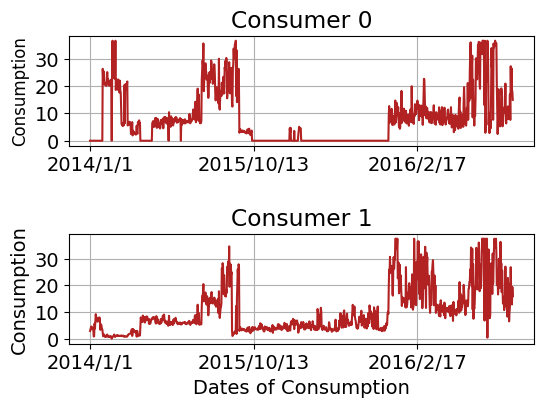

In [21]:
fig_dims = (6, 4)
fig, axs = plt.subplots(2, 1,figsize=fig_dims)
# fig.suptitle('Consumers With Fraud', fontsize=18)

plt.subplots_adjust(hspace=0.8)
data.loc[0].plot(ax=axs[0], color='firebrick', grid=True)
axs[0].set_title('Consumer 0')
# axs[0].set_xlabel('Dates of Consumption', fontsize=14)
axs[0].set_ylabel('Consumption', fontsize=12)
axs[0].locator_params(axis='both', nbins=5)


data.loc[2].plot(ax=axs[1], color='firebrick', grid=True)
axs[1].set_title('Consumer 1')
axs[1].set_xlabel('Dates of Consumption')
axs[1].set_ylabel('Consumption')
axs[1].locator_params(axis='both', nbins=5)
plt.savefig('fraud_plot.png',dpi=750)

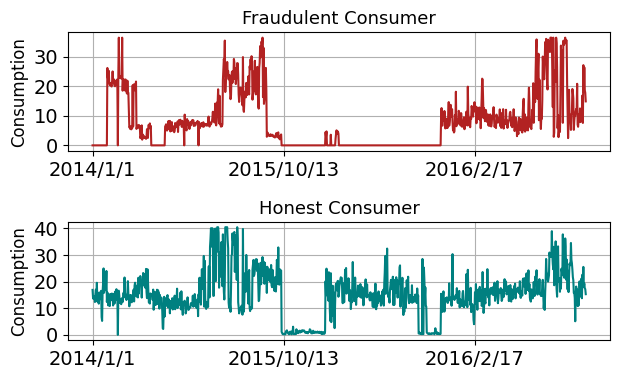

In [22]:
fig_dims = (7, 4)
fig, axs = plt.subplots(2, 1,figsize=fig_dims)
# fig.suptitle('Consumers With Fraud', fontsize=18)

plt.subplots_adjust(hspace=0.6)
data.loc[0].plot(ax=axs[0], color='firebrick', grid=True)
axs[0].set_title('Fraudulent Consumer',fontsize=13)
# axs[0].set_xlabel('Dates of Consumption', fontsize=14)
axs[0].set_ylabel('Consumption', fontsize=12)
axs[0].locator_params(axis='both', nbins=5)


data.loc[3].plot(ax=axs[1], color='teal', grid=True)
axs[1].set_title('Honest Consumer',fontsize=13)
# axs[0].set_xlabel('Dates of Consumption', fontsize=14)
axs[1].set_ylabel('Consumption',fontsize=12)
axs[1].locator_params(axis='both', nbins=5)
plt.savefig('fraud_honest_plot.png',dpi=750)

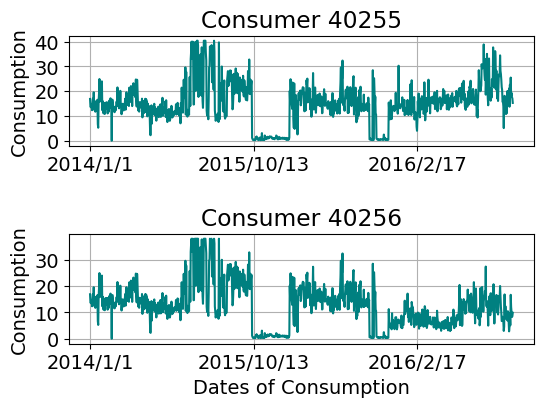

In [23]:
fig_dims = (6, 4)
fig, axs = plt.subplots(2, 1,figsize=fig_dims)
# fig.suptitle('Consumers Without Fraud', fontsize=18)
plt.subplots_adjust(hspace=0.8)

data.loc[3].plot(ax=axs[0], color='teal', grid=True)
axs[0].set_title('Consumer 40255')
# axs[0].set_xlabel('Dates of Consumption', fontsize=14)
axs[0].set_ylabel('Consumption')
axs[0].locator_params(axis='both', nbins=5)
data.loc[4].plot(ax=axs[1], color='teal', grid=True)
axs[1].set_title('Consumer 40256')
axs[1].set_xlabel('Dates of Consumption')
axs[1].set_ylabel('Consumption')
axs[1].locator_params(axis='both', nbins=5)
plt.savefig('honest_plot.png',dpi=750)

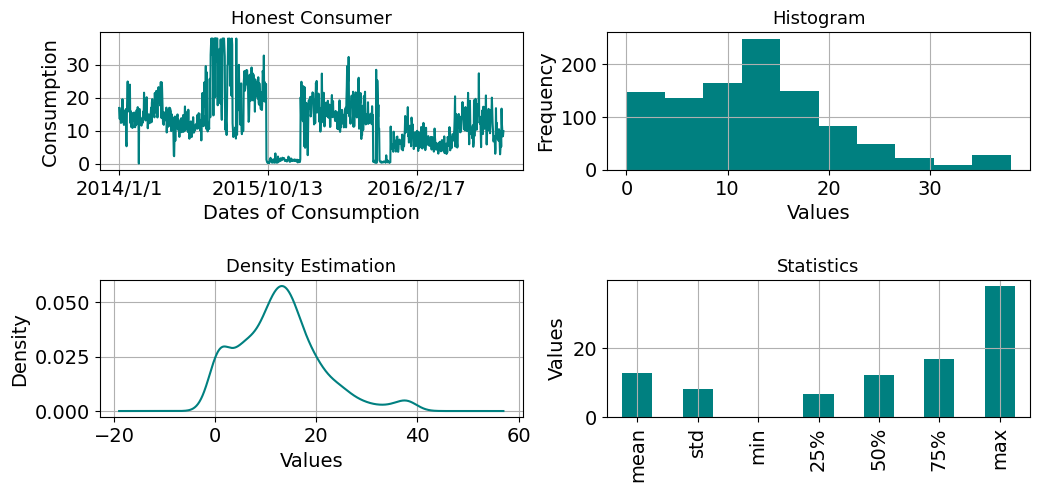

In [24]:
fig_dims = (12, 5)
fig3, axs3 = plt.subplots(2, 2,figsize=fig_dims)
# fig3.suptitle('Statistics for Consumers without Fraud', fontsize=18)
plt.subplots_adjust(hspace=0.8)
data.loc[4].plot(ax=axs3[0, 0], color='teal', grid=True)
axs3[0, 0].set_title('Honest Consumer',fontsize=13)
axs3[0, 0].set_xlabel('Dates of Consumption')
axs3[0, 0].set_ylabel('Consumption')
axs3[0, 0].locator_params(axis='both', nbins=5)

data.loc[4].hist(color='teal', ax=axs3[0, 1])
axs3[0, 1].set_title('Histogram',fontsize=13)
axs3[0, 1].set_xlabel('Values')
axs3[0, 1].set_ylabel('Frequency')

data.loc[4].plot.kde(color='teal', ax=axs3[1, 0], grid=True)
axs3[1, 0].set_title('Density Estimation',fontsize=13)
axs3[1, 0].set_xlabel('Values')
axs3[1, 0].set_ylabel('Density')

data.loc[4].describe().drop(['count']).plot(kind='bar', ax=axs3[1, 1], color='teal', grid=True)
axs3[1, 1].set_title('Statistics',fontsize=13)
axs3[1, 1].set_ylabel('Values')
plt.savefig('Cust40256.png',dpi=300)

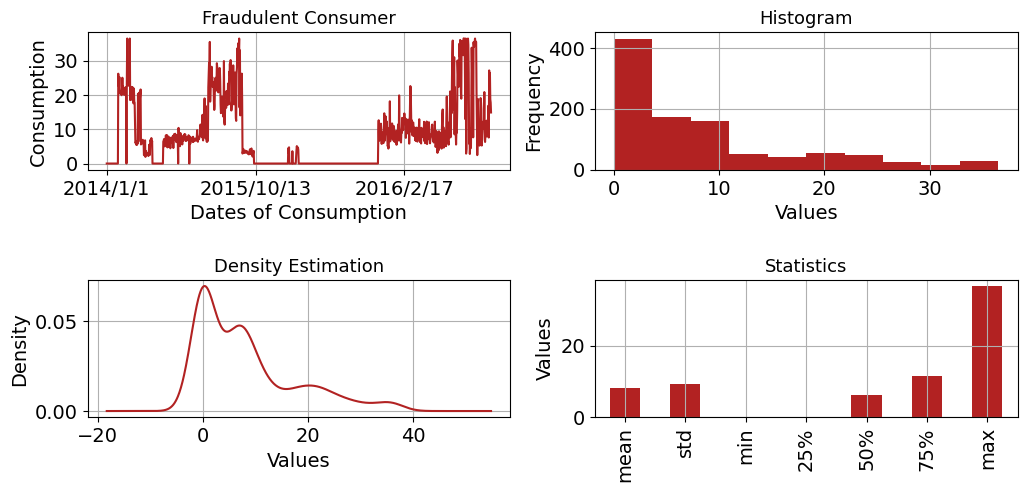

In [25]:
fig_dims = (12, 5)
fig2, axs2 = plt.subplots(2, 2,figsize=fig_dims)
# fig2.suptitle('Statistics for Consumers without Fraud', fontsize=18)
plt.subplots_adjust(hspace=0.8)
data.loc[0].plot(ax=axs2[0, 0], color='firebrick', grid=True)
axs2[0, 0].set_title('Fraudulent Consumer',fontsize=13)
axs2[0, 0].set_xlabel('Dates of Consumption')
axs2[0, 0].set_ylabel('Consumption')
axs2[0, 0].locator_params(axis='both', nbins=5)

data.loc[0].hist(color='firebrick', ax=axs2[0, 1], grid=True)
axs2[0, 1].set_title('Histogram',fontsize=13)
axs2[0, 1].set_xlabel('Values')
axs2[0, 1].set_ylabel('Frequency')
# axs2[0, 1].locator_params(axis='both', nbins=5)

data.loc[0].plot.kde(color='firebrick', ax=axs2[1, 0], grid=True)
axs2[1, 0].set_title('Density Estimation',fontsize=13)
axs2[1, 0].set_xlabel('Values')
axs2[1, 0].set_ylabel('Density')

data.loc[0].describe().drop(['count']).plot(kind='bar', ax=axs2[1, 1], color='firebrick', grid=True)
axs2[1, 1].set_title('Statistics',fontsize=13)
axs2[1, 1].set_ylabel('Values')
plt.savefig('Cust0.png',dpi=300)

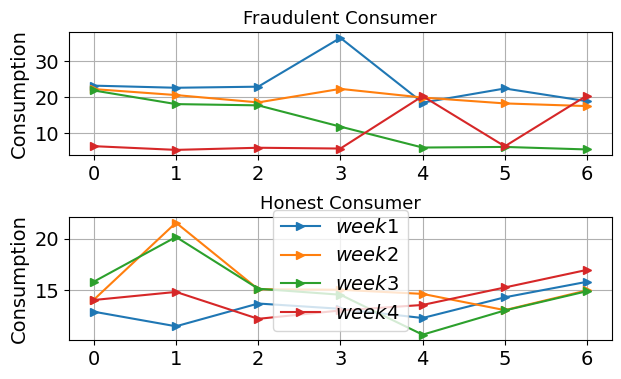

In [26]:
fig_dims = (7, 4)
fig4, axs4 = plt.subplots(2, 1,figsize=fig_dims)
# fig4.suptitle('Four Week Consumption', fontsize=16)
plt.subplots_adjust(hspace=0.5)

for i in range(59, 83, 7):
    axs4[0].plot(data.iloc[0, i:i + 7].to_numpy(), marker='>', linestyle='-', label='$week {i}$'.format(i=(i % 58) % 6))
# axs4[0].legend()
axs4[0].set_title('Fraudulent Consumer',fontsize=13)
axs4[0].set_ylabel('Consumption')
axs4[0].grid(True)

for i in range(59, 83, 7):
    axs4[1].plot(data.iloc[4, i:i + 7].to_numpy(), marker='>', linestyle='-', label='$week {i}$'.format(i=(i % 58) % 6))
axs4[1].legend(loc='best')
axs4[1].set_title('Honest Consumer',fontsize=13)
axs4[1].set_ylabel('Consumption')
axs4[1].grid(True)
plt.savefig('Weekly.png',dpi=300)

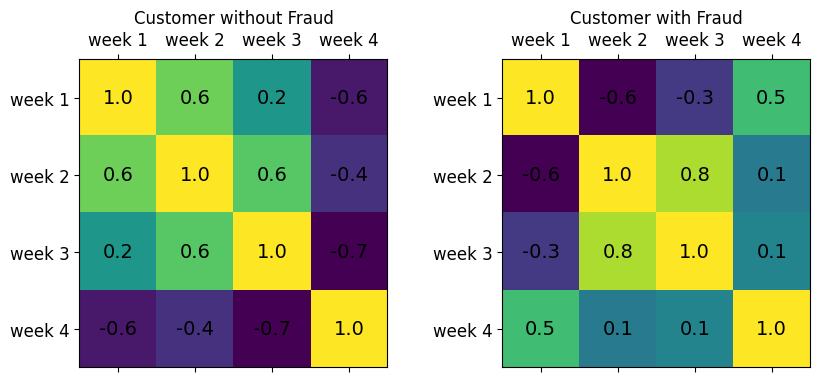

In [15]:
fig_dims = (10, 4)
fig5, axs5 = plt.subplots(1, 2,figsize=fig_dims)
a = []
for i in range(59, 83, 7):
    a.append(data.iloc[0, i:i + 7].to_numpy())
cor = pd.DataFrame(a).transpose().corr()
cax = axs5[0].matshow(cor)
for (i, j), z in np.ndenumerate(cor):
    axs5[0].text(j, i, '{:0.1f}'.format(z),ha='center', va='center')
alpha = ['week 1', 'week 2', 'week 3', 'week 4']
axs5[0].set_xticklabels([''] + alpha,fontsize=12)
axs5[0].set_yticklabels([''] + alpha,fontsize=12)
axs5[0].set_title('Customer without Fraud',fontsize=12)

a = []
for i in range(59, 83, 7):
    a.append(data.iloc[4, i:i + 7].to_numpy())
cor = pd.DataFrame(a).transpose().corr()
cax = axs5[1].matshow(cor)
for (i, j), z in np.ndenumerate(cor):
    axs5[1].text(j, i, '{:0.1f}'.format(z),ha='center', va='center')
axs5[1].set_xticklabels([''] + alpha,fontsize=12)
axs5[1].set_yticklabels([''] + alpha,fontsize=12)
axs5[1].set_title('Customer with Fraud',fontsize=12)
# plt.close('all')
plt.savefig('corrWeek.png',dpi=750)
plt.show()

________________

## Models

__________

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, confusion_matrix, \
    precision_recall_fscore_support, roc_auc_score
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import numpy as np

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import KMeansSMOTE
from matplotlib import pyplot
from numpy import where


In [ ]:
# pip install imblearn

In [ ]:
tf.random.set_seed(1994)
epochs_number = 1  # number of epochs for the neural networks
test_set_size = 0.2  # percentage of the test size comparing to the whole dataset
oversampling_flag = 1  # set to 1 to over-sample the minority class
oversampling_percentage = 0.2  # percentage of the minority class after the oversampling comparing to majority class

### SMOTE Evaluation

In [ ]:
def SMOTE_Eval(A,B,pre):
    y_trainWS=B.sample(frac=0.05)
    X_trainWS=A.sample(frac=0.075)
    # summarize class distribution
    counter = Counter(y_trainWS)
    print(counter)
    # scatter plot of examples by class label
    pyplot.figure(figsize=(5.5,4.5))

    for label, _ in counter.items():
        row_ix = where(y_trainWS == label)[0]
        pyplot.scatter(X_trainWS.iloc[row_ix, 0], X_trainWS.iloc[row_ix, 1], label=str(label))
    pyplot.xlabel('Consumption Day 1')
    pyplot.ylabel('Consumption Day 2')
    pyplot.legend()
    pyplot.savefig(pre+'_smote.png',dpi=200)
    pyplot.show()

### Read and Split the Data

In [ ]:
# Definition of functions
def read_data(test_set_size=0.2):
    rawData = pd.read_csv('preprocessedR.csv')

    # Setting the target and dropping the unnecessary columns
    y = rawData[['FLAG']]
    X = rawData.drop(['FLAG', 'CONS_NO'], axis=1)

    print('Normal Consumers:                    ', y[y['FLAG'] == 0].count()[0])
    print('Consumers with Fraud:                ', y[y['FLAG'] == 1].count()[0])
    print('Total Consumers:                     ', y.shape[0])
    print("Classification assuming no fraud:     %.2f" % (y[y['FLAG'] == 0].count()[0] / y.shape[0] * 100), "%")

    # columns reindexing according to dates
    X.columns = pd.to_datetime(X.columns)
    X = X.reindex(X.columns, axis=1)
    
    # Splitting the dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y['FLAG'], test_size=test_set_size, random_state=1994)
    print("Test set assuming no fraud:           %.2f" % (y_test[y_test == 0].count() / y_test.shape[0] * 100), "%\n")
    SMOTE_Eval(X_train,y_train,'without')
    # Oversampling of minority class to encounter the imbalanced learning
    if oversampling_flag == 1:
        over = SMOTE(random_state=1994)
        X_train, y_train = over.fit_resample(X_train, y_train)
#         X_test, y_test = over.fit_resample(X_test, y_test)
        print("Oversampling statistics in training set: ")
        print('Normal Consumers:                    ', y_train[y_train == 0].count())
        print('Consumers with Fraud:                ', y_train[y_train == 1].count())
        print("Total Consumers                      ", X_train.shape[0])
    SMOTE_Eval(X_train,y_train,'with')
    return X_train, X_test, y_train, y_test

### Model Performances

In [ ]:
def model_performance(y_test, y_pred,name,ratio):
    print('===========================================================')
    print('-                                                         -')
    print("Accuracy", 100 * accuracy_score(y_test, y_pred))
    print("Precision:", 100 * precision_recall_fscore_support(y_test, y_pred)[0])
    print("Recall:", 100 * precision_recall_fscore_support(y_test, y_pred)[1])
    print("F1:", 100 * precision_recall_fscore_support(y_test, y_pred)[2])
    print("AUC:", 100 * roc_auc_score(y_test, y_pred))
    print('-                                                         -')
    print('===========================================================')
    classes = np.unique(y_test)
    y_test_array = pd.get_dummies(y_test, drop_first=False).values
    y_pred_array = pd.get_dummies(y_pred, drop_first=False).values
       
  ## Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots()
    sns.heatmap(cmn, annot=True, fmt='.2f', ax=ax, cmap='YlGnBu', 
            )
    ax.set(xlabel="Predicted", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)
#     plt.savefig(name+'_CM.png',dpi=1200)

  ## Plot roc-auc curve
    plt.figure()
    for i in range(len(classes)):
        fpr, tpr, thresholds = roc_curve(y_test_array[:,i],  
                                         y_pred_array[:,i])
        plt.plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              auc(fpr, tpr),figsize=(20,20),cmap='YlGnBu',linestyle='--')
               )

    plt.plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    plt.xlim([-0.05,1.0])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('Receiver operating characteristic')

    plt.legend(loc='best')
    plt.grid(True)
#     plt.savefig(name+'_ROC.png',dpi=1200)

#### Data / SMOTE 

Normal Consumers:                     36677
Consumers with Fraud:                 3579
Total Consumers:                      40256
Classification assuming no fraud:     91.11 %
Test set assuming no fraud:           91.58 %

Counter({0: 1477, 1: 133})


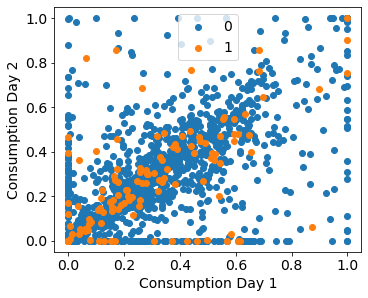

Oversampling statistics in training set: 
Normal Consumers:                     29303
Consumers with Fraud:                 29303
Total Consumers                       58606
Counter({1: 1491, 0: 1439})


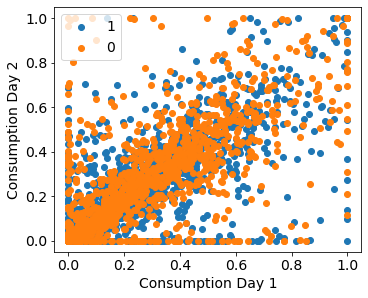

In [ ]:
X_train, X_test, y_train, y_test=read_data()

-----------------

# 1. Random Forest

--------------------

In [ ]:
def RandomForest(X_train,y_train,X_test,y_test,ratio=0.2):
    clf = RandomForestClassifier(random_state=1994, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    model_performance(y_test,y_pred,'RF',ratio)

In [ ]:
# RandomForest(X_train,y_train,X_test,y_test,ratio=0.2)

---------------------

# 2. Decision Tree

--------------

In [ ]:
def DecisionTree(X_train,y_train,X_test,y_test,ratio=0.2):
    clf = DecisionTreeClassifier(random_state=1994)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    model_performance(y_test, y_pred,'DT',ratio)

In [ ]:
# DecisionTree(X_train,y_train,X_test,y_test,ratio=0.2)

-------------

# 3. Multi-Layer Perceptron

---------------

In [ ]:
def MLP(X_train,y_train,X_test,y_test,ratio=0.2):
    clf = MLPClassifier(random_state=1994)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    model_performance(y_test, y_pred,'MLP',ratio)

In [ ]:
# MLP(X_train,y_train,X_test,y_test,ratio=0.2)

------------------

# 4. Support Vector Machine

------------

In [ ]:
def SVM_(X_train,y_train,X_test,y_test,ratio=0.2):
    clf = SVC(random_state=1994)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    model_performance(y_test, y_pred,'SVM',ratio)

In [ ]:
# SVM_(X_train,y_train,X_test,y_test,ratio=0.2)

_______

----------

# Comparison and Saving Results


-------

In [ ]:
def read_data(test_set_size=0.2):
    rawData = pd.read_csv('preprocessedR.csv')

    # Setting the target and dropping the unnecessary columns
    y = rawData[['FLAG']]
    X = rawData.drop(['FLAG', 'CONS_NO'], axis=1)

    # columns reindexing according to dates
    X.columns = pd.to_datetime(X.columns)
    X = X.reindex(X.columns, axis=1)
    
    # Splitting the dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y['FLAG'], test_size=test_set_size, random_state=1994)
    # Oversampling of minority class to encounter the imbalanced learning
    if oversampling_flag == 1:
        over = SMOTE(random_state=1994)
        X_train, y_train = over.fit_resample(X_train, y_train)
#         X_test, y_test = over.fit_resample(X_test, y_test)
    return X_train, X_test, y_train, y_test

_______________

In [ ]:
def model_performance(y_test, y_pred,name,ratio):
    print('===========================================================')
    print('-                                                         -')
    print("Accuracy", 100 * accuracy_score(y_test, y_pred))
    print("Precision:", 100 * precision_recall_fscore_support(y_test, y_pred)[0])
    print("Recall:", 100 * precision_recall_fscore_support(y_test, y_pred)[1])
    print("F1:", 100 * precision_recall_fscore_support(y_test, y_pred)[2])
    print("AUC:", 100 * roc_auc_score(y_test, y_pred))
    print('-                                                         -')
    print('===========================================================')
    classes = np.unique(y_test)
    y_test_array = pd.get_dummies(y_test, drop_first=False).values
    y_pred_array = pd.get_dummies(y_pred, drop_first=False).values
    
    Accuracy=100 * accuracy_score(y_test, y_pred)
    Precision=100 * precision_recall_fscore_support(y_test, y_pred)[0]
    Recall= 100 * precision_recall_fscore_support(y_test, y_pred)[1]
    F1= 100 * precision_recall_fscore_support(y_test, y_pred)[2]
    AUC= 100 * roc_auc_score(y_test, y_pred)
    
    ## Create DataFrame
    data = {'Technique': name,'Ratio':str(ratio),'Accuracy': Accuracy, 'Precision':Precision,'Recall':Recall,'F1':F1,'AUC':AUC}  
  # Creates DataFrame.  
    df = pd.DataFrame(data)  
    df.to_csv(name+'_'+str(ratio)+'_Performance.csv', index=False)

  ## Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots()
    sns.heatmap(cmn, annot=True, fmt='.2f', ax=ax, cmap='YlGnBu', 
            )
    ax.set(xlabel="Predicted", ylabel="True", xticklabels=classes, 
       yticklabels=classes)#, title="Confusion matrix")
    plt.yticks(rotation=0)
    plt.savefig(name+'_'+str(ratio)+'_CM.png',dpi=750)

  ## Plot roc-auc curve
    plt.figure()
    for i in range(len(classes)):
        fpr, tpr, thresholds = roc_curve(y_test_array[:,i],  
                                         y_pred_array[:,i])
        plt.plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              auc(fpr, tpr),figsize=(20,20),cmap='YlGnBu',linestyle='--')
               )

    plt.plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    plt.xlim([-0.05,1.0])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
#     plt.title('Receiver operating characteristic')

    plt.legend(loc='best')
    plt.grid(True)
    plt.savefig(name+'_'+str(ratio)+'_ROC.png',dpi=750)

-------------

-                                                         -
Accuracy 91.00844510680575
Precision: [92.95865633 42.62820513]
Recall: [97.57255221 19.61651917]
F1: [95.20973931 26.86868687]
AUC: 58.594535692255256
-                                                         -
-                                                         -
Accuracy 79.83109786388475
Precision: [93.1422569 15.9221902]
Recall: [84.17412531 32.59587021]
F1: [88.43140048 21.39399806]
AUC: 58.3849977558079
-                                                         -
-                                                         -
Accuracy 90.52409339294584
Precision: [94.73541751 43.58974359]
Recall: [94.92812585 42.62536873]
F1: [94.83167378 43.10216257]
AUC: 68.77674728956798
-                                                         -
-                                                         -
Accuracy 91.4555389965226
Precision: [94.69251337 49.12587413]
Recall: [96.0537022  41.44542773]
F1: [95.36825098 44.96      ]
AU

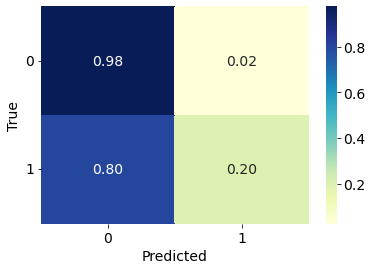

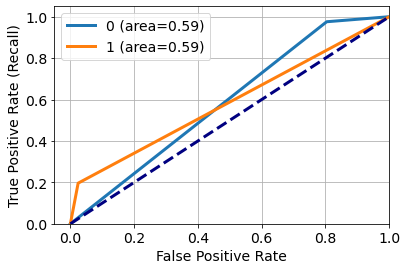

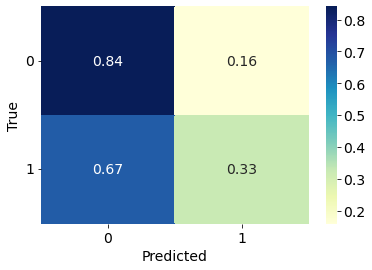

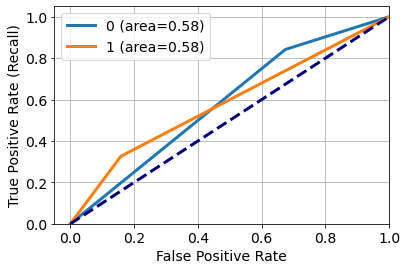

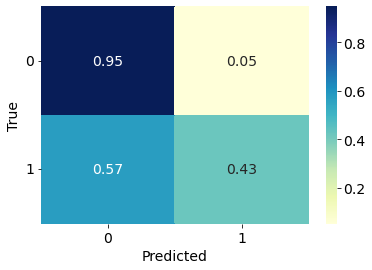

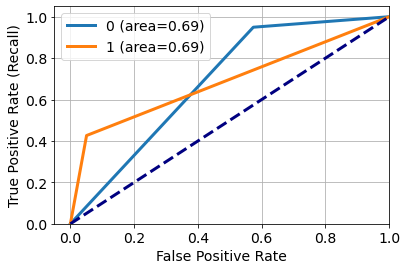

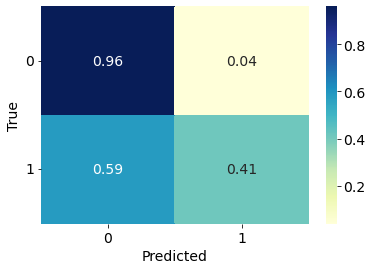

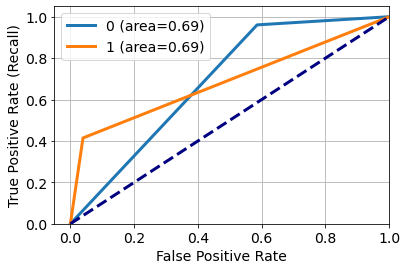

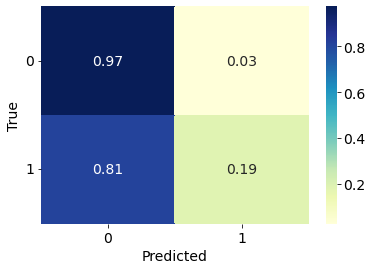

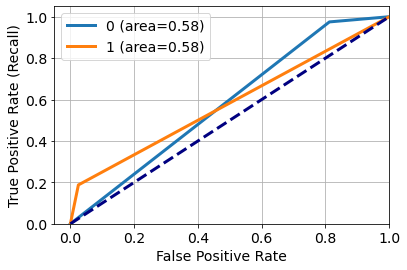

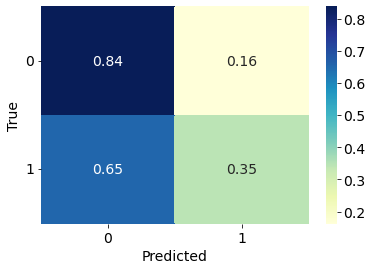

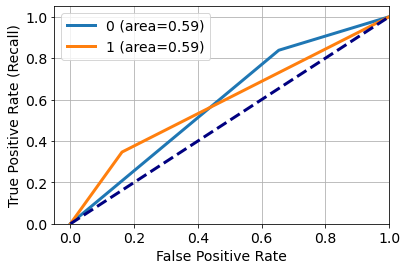

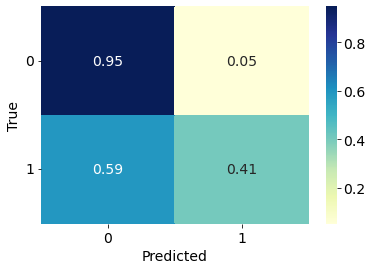

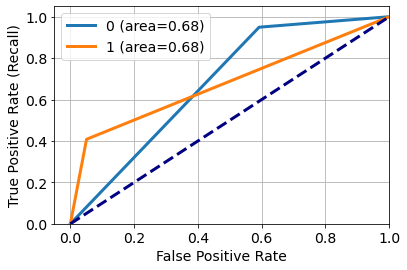

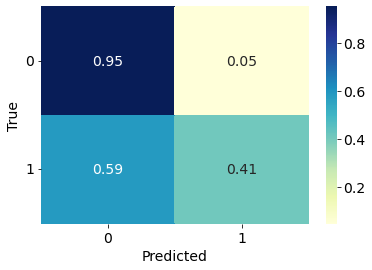

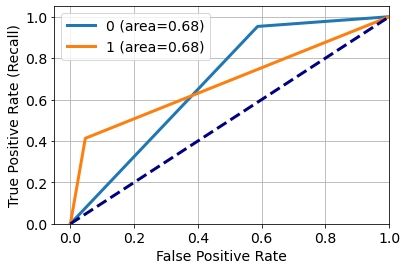

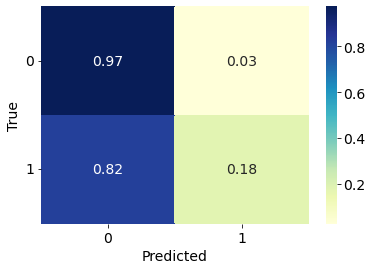

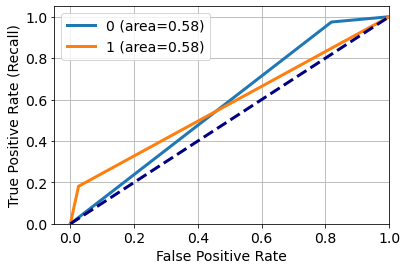

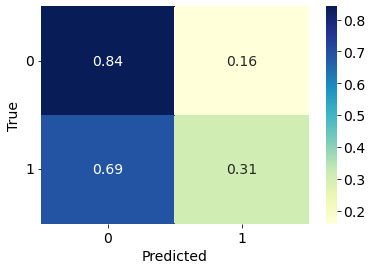

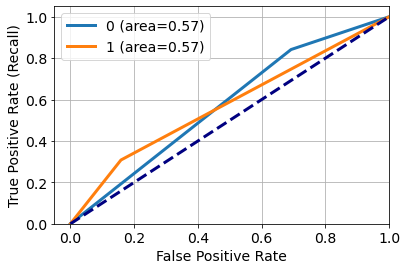

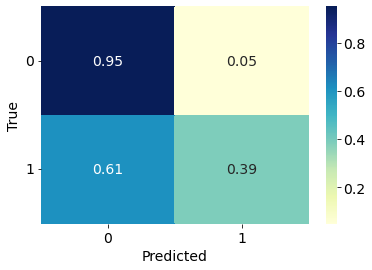

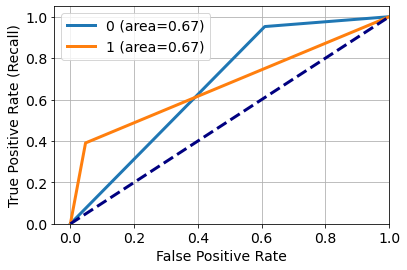

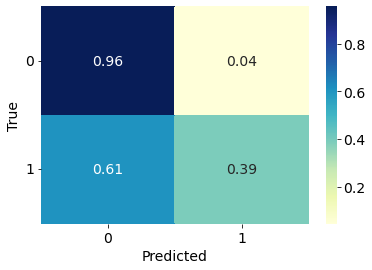

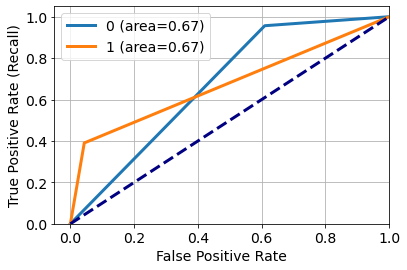

In [ ]:
ratio=[0.2,0.3,0.4]
for r in ratio:
    X_train, X_test, y_train, y_test=read_data(r)
    RandomForest(X_train,y_train,X_test,y_test,r)
    DecisionTree(X_train,y_train,X_test,y_test,r)
    SVM_(X_train,y_train,X_test,y_test,r)
    MLP(X_train,y_train,X_test,y_test,r)

---------